# Machine Learning Quiz 3 Practice
- toc: true
- badges: true
- comments: true
- author: Sachin Yadav
- categories: [MLCourse2022]
- image: https://raw.githubusercontent.com/yadav-sachin/blog/master/_notebooks/assets/2022-02-25-machine-learning-quiz3/lasso-vis.png

In [1]:
#collapse
# Common imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Interacive input plots
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets


In [2]:
# collapse
plt.style.use("ggplot")

sns.set_style('darkgrid') # darkgrid, white grid, dark, white and ticks
sns.set_palette('deep', 8, color_codes = True)

plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('font', size=13)          # controls default text sizes

# Lasso Regression

LASSO := Least absolute shrinkage and selection operator

- Least absolute $\rightarrow$ that we will be applying $L_{1}$ penalty.
- Shrinkage $\rightarrow$ that we are shrinking the $L_{1}$ norm of $\theta$.
- Selection $\rightarrow$ the selected features would be sparse. A lot of $\theta_{i}$ will be zero. (Inference would be faster)

Popular as it would lead to a sparse solution.

**Benefits of Sparse $\theta$**
- Inference is faster. (Time complexity of Inference in Linear Regression is $O(N \times M)$, where N = Number of samples, M = Number of features)
- Redundant features can be eliminated in the process. Inherently help in interpretability.

$$\theta_{opt} = \arg_{\theta} \min (Y - X\theta)^{T}(Y - X\theta) : \mathopen|| \theta \mathclose||_{1} < S$$
Using the KKT condition, we get
$$\theta_{opt} = \arg_{\theta} \min (Y - X\theta)^{T}(Y - X\theta) + \delta^{2} \mathopen|| \theta \mathclose||_{1}$$
The above function is a convex function. (sum of two convex functions)

**But the $\mathopen|| \theta \mathclose||_{1}$ is not differentiable**
- It is not differentiable at $\theta$ = 0
- Sub-gradient is used when we can't compute gradient for such cases.

- So we can use a generalised gradient descent for sub-gradients here.
- Also, we will explore coordinate descent algorithm.

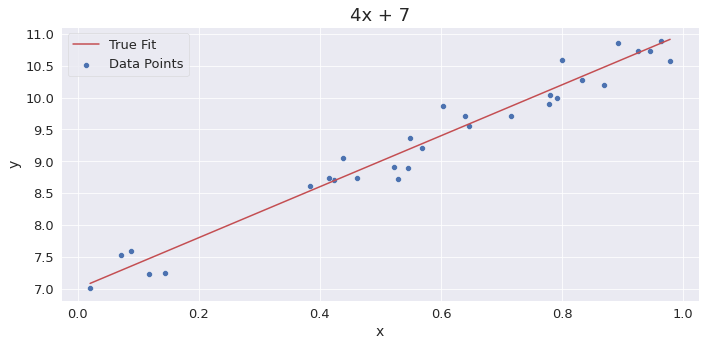

In [3]:
# collapse
np.random.seed(0)
N = 30
x = np.random.random(size = N)
y = 4 * x + 7 + np.random.normal(scale = 0.2, size = N)

fig, ax = plt.subplots(figsize = (10, 5), tight_layout = True)
sns.scatterplot(x = x, y = y, ax = ax, label = "Data Points", color = "b")
sns.lineplot(x = x, y = 4 * x + 7, label = "True Fit", color = "r")

ax.set(title = "4x + 7", xlabel = "x", ylabel = "y")
plt.show()

In [4]:
# collapse
Y = y.reshape(-1, 1)
X = np.ones((N, 2))
X[:, 1] = x
mu = 100

t0_range = np.linspace(0, 10, num=200)
t1_range = np.linspace(0, 10, num=200)
T0, T1 = np.meshgrid(t0_range, t1_range)


def plot_lasso_plot(mu):
    Z = []
    Z_constrained = []
    for t0 in t0_range:
        for t1 in t1_range:
            theta = np.array([t0, t1]).reshape(-1, 1)
            z = (Y - X @ theta).T @ (Y - X @ theta)
            z_cons = z + mu * np.linalg.norm(theta.reshape(-1), ord=1)
            Z_constrained += [z_cons]
            Z += [z]

    Z = np.array(Z).reshape(T0.shape)
    Z_constrained = np.array(Z_constrained).reshape(T0.shape)
    optimum_theta_idx = np.unravel_index(np.argmin(Z, axis=None), Z.shape)
    optimum_theta_cons_idx = np.unravel_index(
        np.argmin(Z_constrained, axis=None), Z.shape
    )

    fig, ax = plt.subplots(ncols=2, figsize=(20, 10), tight_layout=True)
    plt.contourf(T0, T1, Z, levels=50, alpha=0.7)
    plt.scatter(
        T0[optimum_theta_idx],
        T1[optimum_theta_idx],
        marker="*",
        s=200,
        color="y",
        label="unconstrained optimum",
    )
    plt.scatter(
        T0[optimum_theta_cons_idx],
        T1[optimum_theta_cons_idx],
        marker="*",
        s=200,
        color="b",
        label="lasso regression",
    )

    optimum_theta_cons = np.array(
        [T0[optimum_theta_cons_idx], T1[optimum_theta_cons_idx]]
    ).reshape(-1, 1)
    lasso_theta_norm = np.sum(np.abs(optimum_theta_cons.reshape(-1)))
    ax[1].fill(
        [lasso_theta_norm, 0, 0, 0],
        [0, lasso_theta_norm, 0, 0],
        "g",
        alpha=0.5,
        label=rf"$\theta \; L_{1}$ norm constraint $\leq$ {lasso_theta_norm:.4f}",
    )

    sns.scatterplot(x=x, y=y, ax=ax[0], label="Data Points", color="b")
    sns.lineplot(x=x, y=4 * x + 7, ax=ax[0], label="True Fit", color="r")
    sns.lineplot(
        x=X[:, 1],
        y=(X @ optimum_theta_cons).reshape(-1),
        ax=ax[0],
        label="Lasso Fit",
        color="g",
        linestyle="-.",
    )
    ax[1].legend()
    ax[0].legend()
    ax[1].set(
        title="Least Square Objective function",
        xlabel=r"$\theta_{0}$",
        ylabel=r"$\theta_{1}$",
    )
    ax[0].set(
        title=rf"Line Fit $\mu$ = {mu} :: $\theta$ = {optimum_theta_cons.reshape(-1)}",
        xlabel=r"x",
        ylabel=r"y",
    )
    fig.show()

interact(
    plot_lasso_plot,
    mu=widgets.FloatSlider(
        name="mu", value=5, min=0, max=100, step=0.2, description=r"mu: "
    ),
)

interactive(children=(FloatSlider(value=5.0, description='mu: ', step=0.2), Output()), _dom_classes=('widget-i…

<function __main__.plot_lasso_plot(mu)>

> Note: To view the interactive Lasso regression visualization, run the notebook in Colab.

## Coordinate Descent